# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [29]:
# Use this cell for your code
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
np.shape(df)

(891, 12)

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Use this cell for your code
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df.head()
np.shape(df)

(891, 9)

3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [32]:
# Use this cell for your code
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')
df=df.drop('Cabin',axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [34]:
# Use this cell for your code
df['Deck_enc'] = df['Deck'].astype('category').cat.codes
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Deck_enc
0,0,3,male,22.0,1,0,7.2500,S,NaN,-1
1,1,1,female,38.0,1,0,71.2833,C,C,2
2,1,3,female,26.0,0,0,7.9250,S,NaN,-1
3,1,1,female,35.0,1,0,53.1000,S,C,2
4,0,3,male,35.0,0,0,8.0500,S,NaN,-1


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [36]:
# Use this cell for your code
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Deck        687
Deck_enc      0
dtype: int64

In [39]:
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum())
df.head()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Deck        687
Deck_enc      0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Deck_enc
0,0,3,male,22.0,1,0,7.2500,S,NaN,-1
1,1,1,female,38.0,1,0,71.2833,C,C,2
2,1,3,female,26.0,0,0,7.9250,S,NaN,-1
3,1,1,female,35.0,1,0,53.1000,S,C,2
4,0,3,male,35.0,0,0,8.0500,S,NaN,-1


In [40]:
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())
df.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
Deck_enc    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Deck_enc
0,0,3,male,22.0,1,0,7.2500,S,C,-1
1,1,1,female,38.0,1,0,71.2833,C,C,2
2,1,3,female,26.0,0,0,7.9250,S,C,-1
3,1,1,female,35.0,1,0,53.1000,S,C,2
4,0,3,male,35.0,0,0,8.0500,S,C,-1


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [6]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [41]:
# Use this cell for your code
df.to_json("titanic_processed.json", orient="records", indent=4)

In [46]:
df = pd.read_json("titanic_processed.json")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Deck_enc
0,0,3,male,22.0,1,0,7.2500,S,C,-1
1,1,1,female,38.0,1,0,71.2833,C,C,2
2,1,3,female,26.0,0,0,7.9250,S,C,-1
3,1,1,female,35.0,1,0,53.1000,S,C,2
4,0,3,male,35.0,0,0,8.0500,S,C,-1


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [47]:
# Use this cell for your code

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical variables - Mode:")
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    print(f"{col}: {mode_value}")

print("\nNumerical variables - Median:")
for col in numerical_cols:
    median_value = df[col].median()
    print(f"{col}: {median_value}")

Categorical variables - Mode:
Sex: male
Embarked: S
Deck: C

Numerical variables - Median:
Survived: 0.0
Pclass: 3.0
Age: 29.6991176471
SibSp: 0.0
Parch: 0.0
Fare: 14.4542
Deck_enc: -1.0


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [48]:
# Use this cell for your code
df_s = df[df['Survived'] == 1]
df_ns = df[df['Survived'] == 0]
avg_survivor = {}

for col in numerical_cols:
    avg_survivor[col] = df_s[col].median()

for col in categorical_cols:
    avg_survivor[col] = df_s[col].mode()[0]

# Average non-survivor
avg_non_survivor = {}

# Numerical → median
for col in numerical_cols:
    avg_non_survivor[col] = df_ns[col].median()

# Categorical → mode
for col in categorical_cols:
    avg_non_survivor[col] = df_ns[col].mode()[0]

In [50]:
print("Average Survivor:")
for k, v in avg_survivor.items():
    print(f"{k}: {v}")

print("\nAverage Non-Survivor:")
for k, v in avg_non_survivor.items():
    print(f"{k}: {v}")

Average Survivor:
Survived: 1.0
Pclass: 2.0
Age: 29.6991176471
SibSp: 0.0
Parch: 0.0
Fare: 26.0
Deck_enc: -1.0
Sex: female
Embarked: S
Deck: C

Average Non-Survivor:
Survived: 0.0
Pclass: 3.0
Age: 29.6991176471
SibSp: 0.0
Parch: 0.0
Fare: 10.5
Deck_enc: -1.0
Sex: male
Embarked: S
Deck: C


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

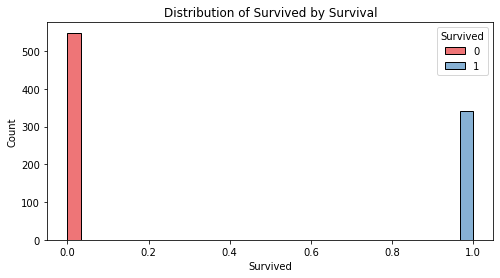

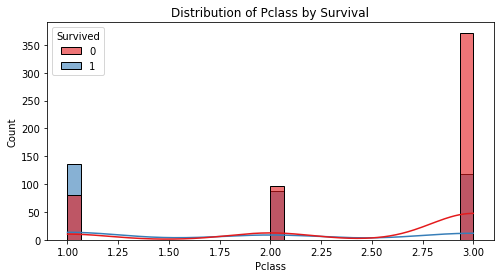

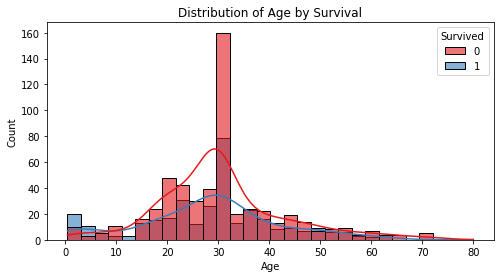

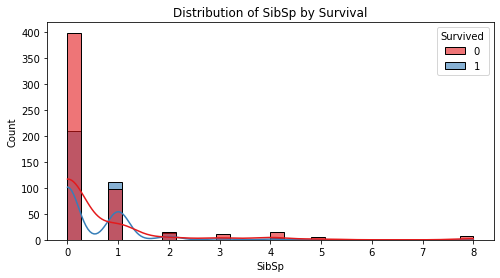

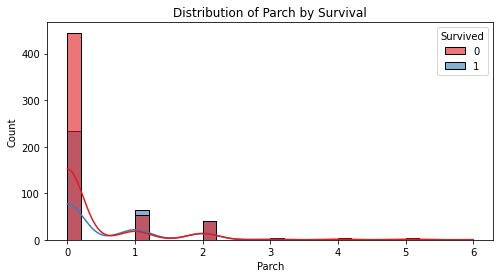

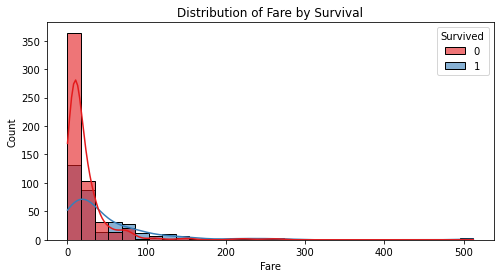

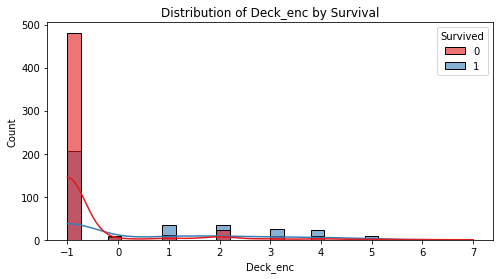

In [52]:
# Use this cell for your code
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df, x=col, hue='Survived', kde=True, bins=30, palette='Set1', alpha=0.6)
    plt.title(f"Distribution of {col} by Survival")
    plt.show()

In [59]:
from scipy.spatial.distance import cdist
features = numerical_cols.tolist()
X_s = df_s[features].values
#X_ns = df_ns[features].values

# Average vectors
avg_survivor_vector = np.array([avg_survivor[col] for col in features])
avg_non_survivor_vector = np.array([avg_non_survivor[col] for col in features])

# Compute distances
dist_to_own = cdist(X_s, [avg_survivor_vector], metric='euclidean')
dist_to_other = cdist(X_s, [avg_non_survivor_vector], metric='euclidean')

# Find closest survivor to average survivor
closest_idx = np.argmin(dist_to_own)
print("Survivor closest to average survivor:")
print(df_s.iloc[closest_idx])

# Find survivor closest to average non-survivor
closest_other_idx = np.argmin(dist_to_other)
print("\nSurvivor closest to average non-survivor:")
print(df_s.iloc[closest_other_idx])

Survivor closest to average survivor:
Survived            1
Pclass              1
Sex              male
Age         29.699118
SibSp               0
Parch               0
Fare            26.55
Embarked            S
Deck                C
Deck_enc           -1
Name: 507, dtype: object

Survivor closest to average non-survivor:
Survived       1
Pclass         3
Sex         male
Age         30.0
SibSp          0
Parch          0
Fare         9.5
Embarked       S
Deck           C
Deck_enc      -1
Name: 286, dtype: object


4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

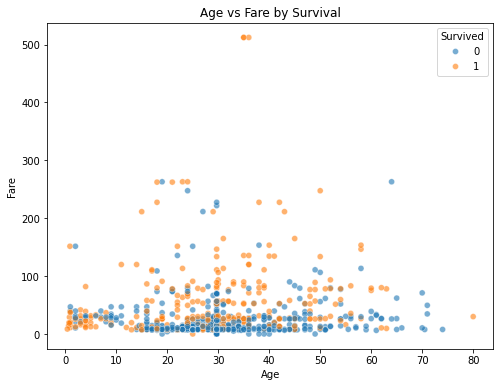

In [60]:
# Use this cell for your code
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Age", 
    y="Fare", 
    hue="Survived", 
    alpha=0.6  # transparency
)
plt.title("Age vs Fare by Survival")
plt.show()

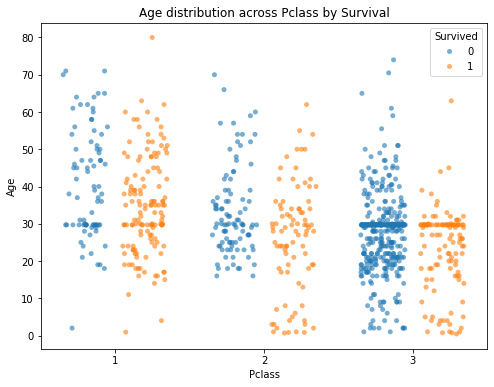

In [61]:
plt.figure(figsize=(8,6))
sns.stripplot(
    data=df,
    x="Pclass",
    y="Age",
    hue="Survived",
    dodge=True,
    alpha=0.6,
    jitter=0.3
)
plt.title("Age distribution across Pclass by Survival")
plt.show()

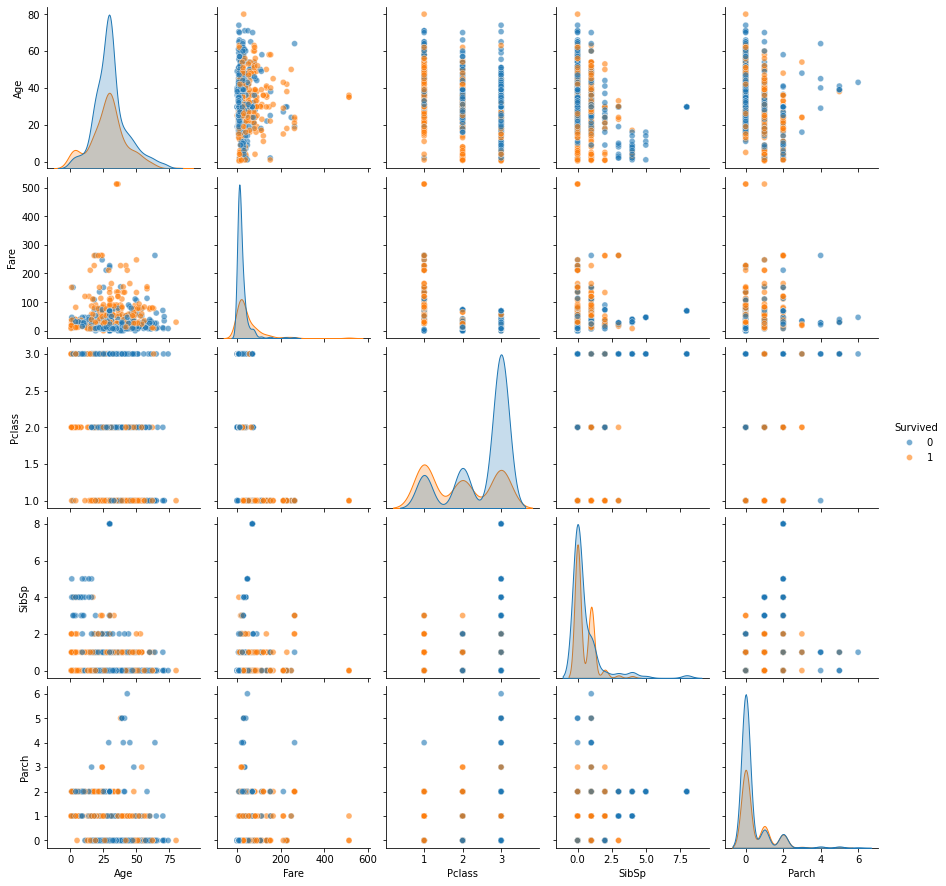

In [62]:
sns.pairplot(
    df[["Age","Fare","Pclass","SibSp","Parch","Survived"]],
    hue="Survived",
    diag_kind="kde",
    plot_kws={"alpha":0.6}
)
plt.show()


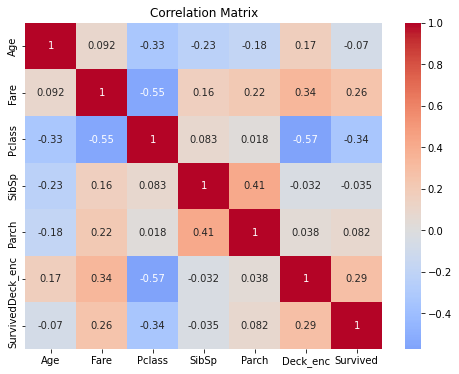

In [63]:
corr = df[["Age","Fare","Pclass","SibSp","Parch","Deck_enc","Survived"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [66]:
# Use this cell for your code
import re
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"[^a-z\s]", "", text.lower())
    words = [w for w in text.split() if w not in stop_words]
    return words

with open("pos.txt", "r", encoding="utf-8") as f:
    pos_text = f.read()
    pos_words = clean_text(pos_text)
with open("neg.txt", "r", encoding="utf-8") as f:
    neg_text = f.read()
    neg_words = clean_text(neg_text)

pos_common = Counter(pos_words).most_common(20)
neg_common = Counter(neg_words).most_common(20)

print("Most common positive words:", pos_common)
print("Most common negative words:", neg_common)

Most common positive words: [('great', 435943), ('work', 427790), ('use', 345250), ('good', 291461), ('fit', 273537), ('instal', 229416), ('product', 210098), ('look', 181414), ('like', 175727), ('easi', 162868), ('light', 147339), ('car', 147224), ('price', 144915), ('need', 136525), ('perfect', 124435), ('time', 123980), ('replac', 122262), ('qualiti', 119733), ('nice', 119319), ('make', 96990)]
Most common negative words: [('work', 39998), ('use', 37248), ('fit', 31299), ('product', 24395), ('light', 22916), ('like', 20686), ('time', 19673), ('look', 18824), ('instal', 18709), ('good', 17296), ('dont', 17139), ('buy', 16889), ('car', 16702), ('return', 15227), ('tri', 14958), ('doe', 14202), ('replac', 13510), ('didnt', 13047), ('bulb', 12515), ('month', 12226)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [67]:
# Use this cell for your code
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform([pos_text, neg_text])
feature_names = vectorizer.get_feature_names_out()

print("TF-IDF shape:", X.shape) 

TF-IDF shape: (2, 235156)


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [68]:
# Use this cell for your code
def top_tfidf_words(row, features, top_n=15):
    row_data = row.toarray().flatten()
    top_idx = np.argsort(row_data)[::-1][:top_n]
    return [(features[i], row_data[i]) for i in top_idx]

pos_top_tfidf = top_tfidf_words(X[0], feature_names, 15)
neg_top_tfidf = top_tfidf_words(X[1], feature_names, 15)

print("Top TF-IDF words in positive:", pos_top_tfidf)
print("Top TF-IDF words in negative:", neg_top_tfidf)

Top TF-IDF words in positive: [('great', 0.367661608327643), ('work', 0.3608069675650979), ('use', 0.291184329890058), ('good', 0.2458190403546511), ('fit', 0.23068518786266795), ('instal', 0.19349199311602686), ('product', 0.17719419276477064), ('look', 0.1530009461014454), ('just', 0.15217353099278824), ('like', 0.1482135779498266), ('easi', 0.1373660899656882), ('light', 0.12425733806074465), ('car', 0.12414937767959469), ('price', 0.12220693425937304), ('need', 0.1151464940202608)]
Top TF-IDF words in negative: [('work', 0.3031839843855168), ('use', 0.28230872329751955), ('fit', 0.23720785057653787), ('product', 0.1849059981774163), ('just', 0.17874347556865022), ('light', 0.17363456998647514), ('like', 0.15679185751823627), ('time', 0.14906027933749658), ('look', 0.14268551732769058), ('instal', 0.14181381978770521), ('did', 0.1398278653922603), ('good', 0.13109573003518957), ('dont', 0.1298905134364272), ('buy', 0.12798793880567655), ('car', 0.12654016289144)]


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

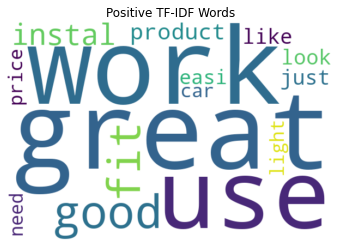

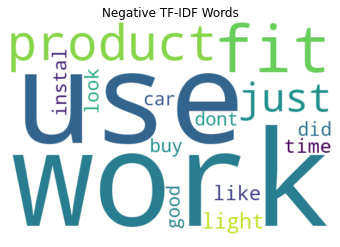

In [69]:
# Use this cell for your code
from wordcloud import WordCloud
def plot_wordcloud(words_scores, title):
    wc = WordCloud(width=600, height=400, background_color="white")
    wc.generate_from_frequencies(dict(words_scores))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(dict(pos_top_tfidf), "Positive TF-IDF Words")
plot_wordcloud(dict(neg_top_tfidf), "Negative TF-IDF Words")

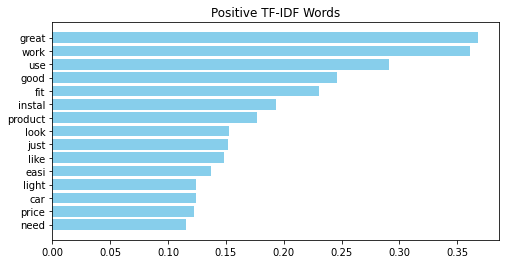

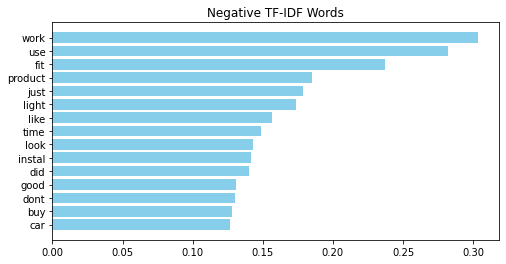

In [70]:
def plot_bar(words_scores, title):
    words, scores = zip(*words_scores)
    plt.figure(figsize=(8,4))
    plt.barh(words, scores, color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

plot_bar(pos_top_tfidf, "Positive TF-IDF Words")
plot_bar(neg_top_tfidf, "Negative TF-IDF Words")

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**